In [1]:
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# for train
# RGB_inputs_path = "E:\\dataset\\SublingualVein\\TIASRGB2020\\inputs"
# RGB_masks_path = "E:\\dataset\\SublingualVein\\TIASRGB2020\\selected_masks\\raw"


# output_binary_labels = "E:\\dataset\\SublingualVein\\TIASRGB2020\\selected_masks\\binaryMasks"
# output_query_images = "E:\\dataset\\SublingualVein\\TIASRGB2020\\query_inputs"


# # fro val
# RGB_inputs_path = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val"
# RGB_masks_path = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val_selected_masks\\raw"


# output_binary_labels = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val_selected_masks\\binaryMasks"
# output_query_images = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val_query_inputs"

# fro color transfered
RGB_inputs_path = "E:\\dataset\\SublingualVein\\TIASRGB2020\\raw_col_tr_mixed_inputs"
RGB_masks_path = "E:\\dataset\\SublingualVein\\TIASRGB2020\\raw_col_tr_mixed_labels"


output_binary_labels = "E:\\dataset\\SublingualVein\\TIASRGB2020\\raw_col_tr_binaryMask"
output_query_images = "E:\\dataset\\SublingualVein\\TIASRGB2020\\raw_col_tr_queryPatch"

RGB_inputs_paths =  sorted(glob(RGB_inputs_path+ "/*.bmp"))
RGB_masks_paths =  sorted(glob(RGB_masks_path+ "/*.png"))
print("len:", len(RGB_inputs_paths))
print("len:", len(RGB_masks_paths))
print(RGB_masks_paths[0])

len: 438
len: 438
E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_labels\1002dozono01 (1).png


filename 1002dozono01 (1)
each_input_path: E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_inputs\1002dozono01 (1).bmp
each_mask_path： E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_labels\1002dozono01 (1).png
mask: (1920, 1080, 3)
(1920, 1080)
bool_mask.shape: (1920, 1080)
non_zero_indices.shape: (array([774, 775, 775, ..., 971, 971, 972], dtype=int64), array([403, 402, 403, ..., 641, 642, 642], dtype=int64))


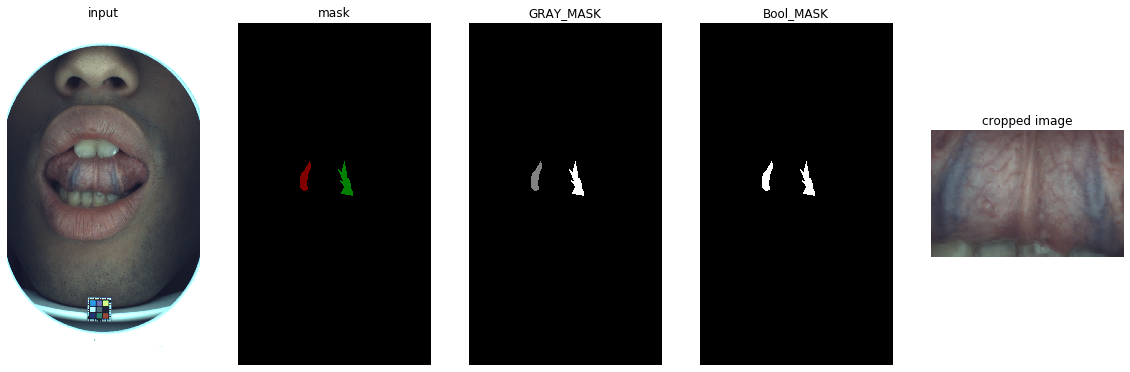

filename 1002dozono01 (10)
each_input_path: E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_inputs\1002dozono01 (10).bmp
each_mask_path： E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_labels\1002dozono01 (10).png
mask: (1920, 1080, 3)
(1920, 1080)
bool_mask.shape: (1920, 1080)
non_zero_indices.shape: (array([726, 727, 728, ..., 968, 969, 969], dtype=int64), array([590, 590, 590, ..., 660, 452, 661], dtype=int64))
filename 1002dozono01 (2)
each_input_path: E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_inputs\1002dozono01 (2).bmp
each_mask_path： E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_labels\1002dozono01 (2).png
mask: (1920, 1080, 3)
(1920, 1080)
bool_mask.shape: (1920, 1080)
non_zero_indices.shape: (array([790, 791, 791, ..., 962, 962, 963], dtype=int64), array([454, 453, 454, ..., 531, 532, 528], dtype=int64))
filename 1002dozono01 (3)
each_input_path: E:\dataset\SublingualVein\TIASRGB2020\raw_col_tr_mixed_inputs\1002dozono01 (3).bmp
each_mask_pat

In [2]:
fig, axes = plt.subplots(1,5, figsize=(20,20))
for (each_input_path, each_mask_path)  in  zip(RGB_inputs_paths, RGB_masks_paths):
    filename = os.path.splitext(os.path.basename(each_input_path))[0]
    print("filename",filename)
    print("each_input_path:", each_input_path)
    print("each_mask_path：", each_mask_path)
    
    im = Image.open(each_input_path).convert('RGB')
    mask =  Image.open(each_mask_path).convert('RGB')
    print("mask:", np.array(mask).shape)
    gray_mask =  np.array(mask.convert('L')) # 'LA' means  8 BIT PIXEL AND TRANSPERANCY, SO FOR BINARY USE L
    print(gray_mask.shape)
    bool_mask =  gray_mask>0
    print("bool_mask.shape:", bool_mask.shape)
    non_zero_indices = np.nonzero(bool_mask)  # return row(top =  min, bottom = max ) and column indices(lsef=  min, right =  max)
    
    left =  np.min(non_zero_indices[1])
    right =  np.max(non_zero_indices[1])
    
    top =  np.min(non_zero_indices[0])
    bottom = np.max(non_zero_indices[0])
    
    print("non_zero_indices.shape:",non_zero_indices)
    #     print("mask where:", where)
    axes[0].imshow(im)
    axes[0].set_title('input')
    axes[0].axis('off')
    axes[1].imshow(mask)
    axes[1].set_title('mask')
    axes[1].axis('off')
    axes[2].imshow(gray_mask, cmap="gray")
    axes[2].set_title('GRAY_MASK')
    axes[2].axis('off')
    axes[3].imshow(bool_mask, cmap="gray")
    axes[3].set_title('Bool_MASK')
    axes[3].axis('off')
    
    
    # binar_mask save:
    binary_mask =  Image.fromarray(bool_mask)
    binary_mask.save(output_binary_labels + "/" + filename + ".png")
    # PIL crop : box – a 4-tuple defining the left, upper, right, and lower pixel coordinate.
#     left =  
    croped = im.crop((left, top, right, bottom))
    croped.save(output_query_images + "/" + filename + ".bmp")
    axes[4].imshow(croped)
    axes[4].set_title('cropped image')
    axes[4].axis('off')
    
    plt.show()
    # 

In [3]:
gray_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)